In [21]:
# Load libraries
import copulae
import matplotlib.pyplot as plt
import pandas as pd
import pycop
from copulae import pseudo_obs
from copulae.archimedean import ClaytonCopula, GumbelCopula
from copulae.elliptical import GaussianCopula, StudentCopula
from copulae.gof.goodness_of_fit import gof_copula
from copulas.multivariate import GaussianMultivariate
from scipy.stats import kendalltau

plt.rcParams["figure.figsize"] = (16, 9)  # Figure size and width

# Import dataset
data_set = pd.read_csv("/home/sscf/wqu_mscfe/Financial Econometrics/M3/M3. bond_and_stock_data.csv")
data_set.head(5)

,Date,13W_TB,5Y_TBY,10Y_TBY,30Y_TBY,DWJ,Year
0,1/5/2016,0.322581,-0.006340,0.001336,0.007023,0.000567,2016
1,1/6/2016,0.000000,-0.042923,-0.031584,-0.023580,-0.014695,2016
2,1/7/2016,-0.073171,-0.023030,-0.011024,-0.004762,-0.023211,2016
3,1/8/2016,0.000000,-0.021092,-0.010683,-0.002051,-0.010152,2016
4,1/11/2016,-0.078947,-0.001267,0.013146,0.012329,0.003188,2016


# Change of Variable formula for One-to-One Transformations

$X$ and $Y$ random variables.

let $ Y = a X$,


$\large F_Y(y) = \bm{P}(Y \leq y) = \bm{P}(a X \leq y) = \bm{P}(X \leq \frac{y}{a}) $

$ \large \Rightarrow F_Y(y) = F_X(\frac{y}{a}) $

Then,

$ \large f_Y(y) = \frac{d}{dy} F_Y(y) = \frac{d}{dy} F_X(\frac{y}{a}) = \large \frac{1}{a} \frac{d}{dy} F_X(y) = \large \frac{1}{a} \frac{d}{dx} F_X(x) $

Therefore:

$\Large f_Y(y) = \frac{1}{a} f_X(x) $

For any monotonic (strictly increasing or decreasing) function $u$ where $Y = u(X)$ and $X in [a, b]$;

let $s(x) = u^{-1}(x)$

The following principal is true:

$\Large f_Y(y) = f_X(s(y)) | \frac{ds}{dy}(y) | ,$ if $u(a) \leq y \leq u(b)$

___________________________

# Probability Integral Transform

### *Check tablet for my notes.*

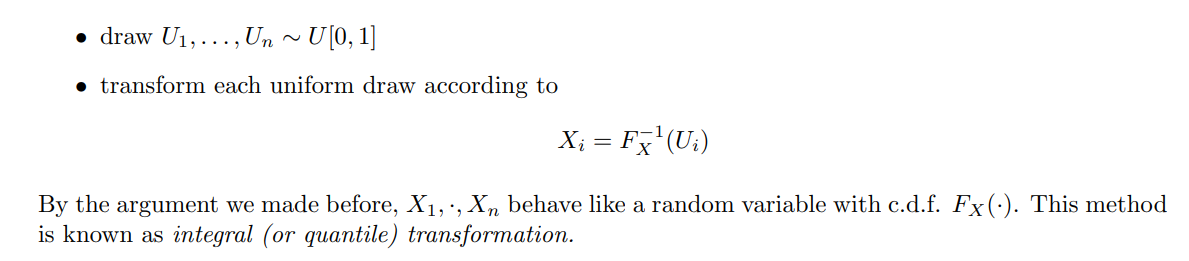

# Copula

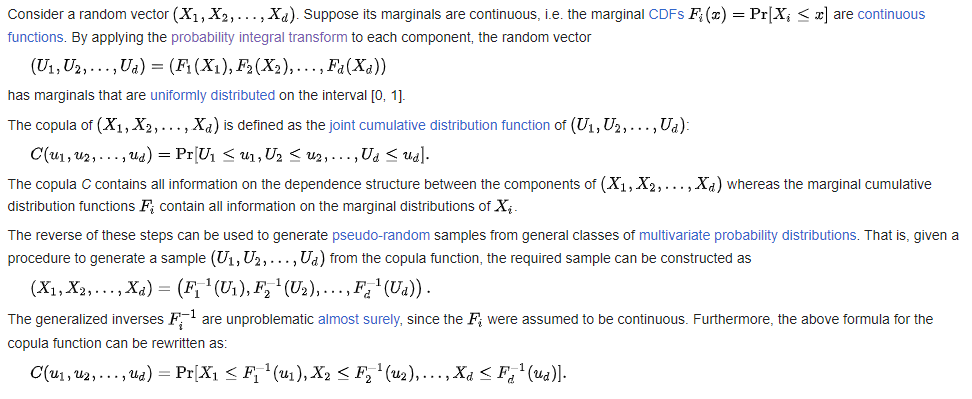

A copula is a function that can take the marginal cumulative function of each random variable as input and generate a **joint cumulative distribution.**

Assuming $X$ and $Y$ are two continuous random variables, the bivariate joint cumulative distribution of $X$ and $Y$ can be written as follows:

$$ H_{X, Y}(x, y) = \bm{P}(X \leq x, Y \leq y) = C(F_X(X), F_Y(Y)) $$

remember that:

$F_X(X)$~$U(0, 1)$

$F_Y(Y)$~$U(0, 1)$

> $H(\cdot)$: joint CDF <br>
> $F(\cdot)$: marginal CDFs <br>
> $C(\cdot)$: Copula function <br>

A copula is a $d$-dimensional joint CDF of a uniform random variables vector $\bm{U} = (U_1, U_2, \cdots, U_d)$ with $ U_i$ ~ $U[0, 1]$ with observations $\bm{u} = (u_1, u_2, \cdots, u_d)$

Here are the propositions that define a copula function:

$ C(u_1, u_2, \cdots, u_d) = \bm{P}(U_1 \leq u_1, U_2 \leq u_2, \cdots, U_d \leq u_d) $

> 1.  $C(\bm{u}) = C(u_1, u_2, \cdots, u_d)$  where $u_i$ is an observation drawn from a uniform marginal distribution.
> 2. $C(u_1, u_2, \cdots, u_d) : [0,1]^d \to [0,1]$. This means $C(u_1, u_2, \cdots, u_d)$ is defined in a $d$-dimensional hypercube space between $0$ and $1$. $C(u_1, u_2, \cdots, u_d)$ maps the $d$-dimensional cubic space to a range between $0$ and $1$.
> 3. $C(u_1, u_2, \cdots, u_{i-1}, 0, u_{i+1}, \cdots, u_d) = 0$ if any component in $C(\cdot)$ is $0$.
> 4. $C(1, 1, \cdots, u_i, \cdots, 1, 1) = u_i$ if all other components except $u_i$ are $1$.
> 5. $C(\cdot)$ must increase or stay the same when any of the components increases. <u> $C(\cdot)$ is a non-decreasing function for each component. </u>
> 6. $C(\cdot)$ must increase or stay the same when all components increase or stay the same (none of them decrease) at the same time. This is also called rectangular inequality or $n$-increasing.

Propositions 1 and 2 tell us that a copula is a joint CDF for uniform standard random variables $U_i$ ~ $U[0, 1]$. Propositions 3–6 are all rules to set up a copula function so that the copula function behaves like a **joint uniform CDF.**

#### **2.2.3 Sklar's Theorem**

Sklar's theorem is defined with the following two propositions:

> 1. Let $H(X,Y)$ be the joint cumulative distribution function of continuous random variables $X$ and $Y$. Also, $F(X)$ and $G(Y)$ are marginal cumulative distribution functions of $X$ and $Y$. Then, there exists a **unique** copula function $C$ such that 
>
> $$ H(X,Y) = C(F(X), G(Y)) $$
>
> 2. On the other hand, if we have marginal cumulative distribution functions $F(X)$ and $G(Y)$ for continuous random variables $X$ and $Y$ and we also have a copula function $C$, then $H(X,Y)$ defined in (1) is a bivariate joint CDF with marginal cumulative distributions $F(X)$ and $G(Y)$.

By applying probability integral transformation as described in the last section, we know $F(X)$ and $G(Y)$ are uniform distributions with a range between $0$ and $1$. Hence, we can use $F(X)$ and $G(Y)$ as inputs for $C(\cdot)$. 

Our description of a copula function in section 2.1 is based on part 2 of Sklar's theorem. According to Sklar's theorem, we can construct a joint cumulative distribution by using a copula function and marginal cumulative functions. By estimating a copula function with the marginal cumulative functions, we can also get the dependence structure among random variables from estimation. Figure 2 connects all the information we have presented above.

**Figure 2: Flow Chart to Use a Copula Function and Marginal CDFs of $X$ and $Y$ to Build Joint CDF of $X$ and $Y$**

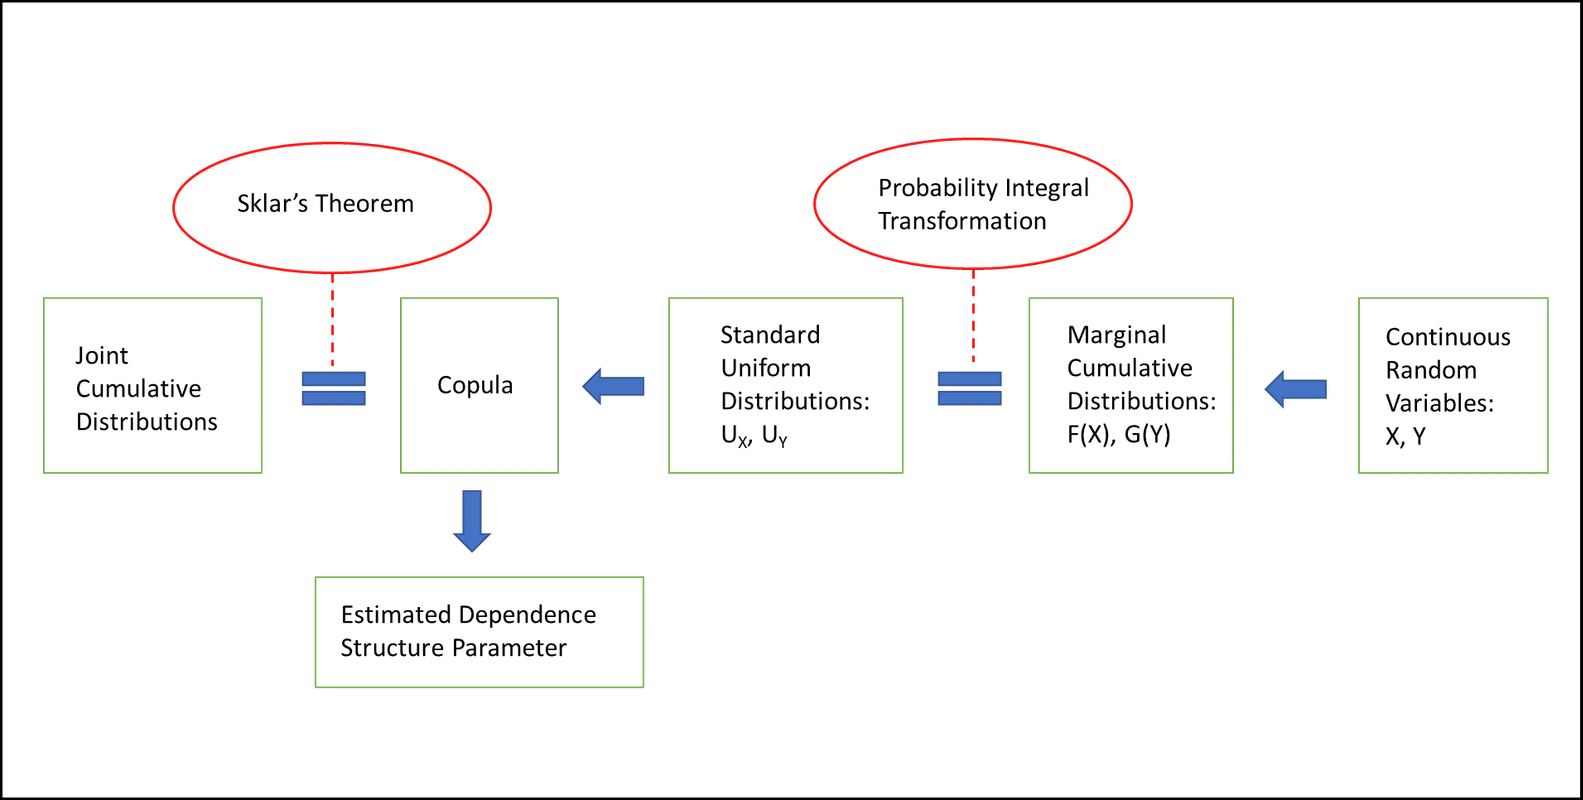


#### **2.2.4 Invariance under Strictly Monotonic Transformations**

Invariance under strictly monotonic transformation states that:

Let random variables $X$ and $Y$ have continuous marginal CDFs and a copula $C_{XY}$. We also have strictly increasing functions $T_X$ and $T_Y$ and we transform $X$ and $Y$ to $X' = T_X(X)$ and $Y' = T_Y(Y)$. The dependence structure of $X$ and $Y$ and the dependence structure of $X'$ and $Y'$ are the same and $(X,Y)$ and $(X',Y')$ share the same copula $C_{XY}$.

This is a statement about the dependence structure property for a copula. Here is one example:

$$ C_{XY}(X,Y) = C_{XY}(ln(X), exp(Y)) $$ 

We can see that $ln(\cdot)$ and $exp(\cdot)$ are strictly increasing functions; $(X,Y)$ and $(ln(X), exp(Y))$ share the same copula. Because of this property of copulas, we can also say that:

* <u> A copula is **scale invariant** under strictly increasing functions. </u> !!

So what is a strictly increasing function? Let's use the following graphs to explain.

In figure 3 below, we show one example of strictly increasing functions. As we can see, as $x$ increases, $f(x)$ increases too. We can use the following math to present the idea:

A function $f(x)$ is a strictly increasing function if $f(b) > f(a)$ for all $b > a$.

**Figure 3: A Strictly Increasing Function Example**

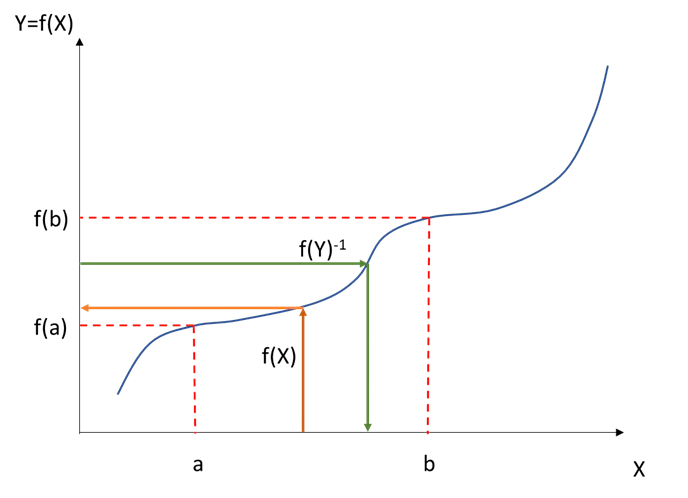


One key point to pay attention to is that there is not $=$ for $f(a)$ and $f(b)$ in the definition. We can see from figure 3, when $X$ increases, $f(X)$ always increases too. $f(X)$ never stays at the same value as $X$ increases. 

Why do we need this specific restriction? It is because we want a one-to-one mapping between $X$ and $Y = f(X)$. Only when we have a one-to-one mapping can we preserve the order of $X$ after the transformation. By using a strictly increasing function to transform data, we can transform the data back and forth, but the order of the data always stays the same. 

We also demonstrate the relationship with brown arrows and green arrows in figure 3. The graph shows that $X$ and $f(X)$ have a one-to-one relationship. For any $X$, you can get a unique $f(X) = Y$. For any $Y$, you can get a unique $f(Y)^{-1} = X$. In figure 4 below, we show an example of a non-strictly increasing function. From figure 4, for a specific $Y$, we cannot get a unique $X$. Actually, for a specific $Y$, we may get multiple $X$ s. This is a one-to-many relationship, and a function does not apply for this relationship. Hence, $f(Y)^{-1}$ does not exist in this case.


**Figure 4: A Non-Strictly Increasing Function Example**

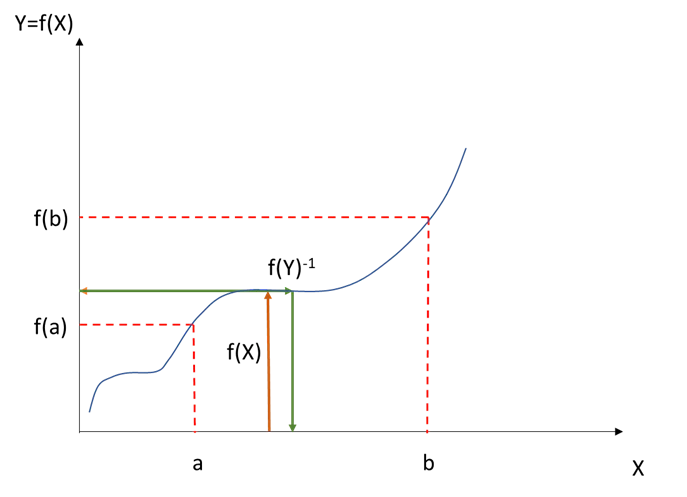


#### **2.2.5 Copula Density Functions**

A copula density function is defined as follows:

$$ c(u_1,u_2) = \frac{\partial ^{2}}{\partial u_2 \ \partial u_1} C(u_1, u_2) $$

$f_{X, Y}(x,y)$ is the joint PDF for $X$ and $Y$, $F_X(x)$ and $F_Y(y)$ are marginal CDFs for $X$ and $Y$. And $f_X(x)$ and $f_Y(y)$ are marginal PDFs for $X$ and $Y$. 

By using calculus and chain rules, we can obtain the following relationship:

$$ f_{X, Y}(x,y) = c(F_X(x), F_Y(y)) f_X(x) f_Y(y) $$

The above result shows us that a joint density function can be expressed as its copula and marginals.


## Tail Dependence in Copula Functions

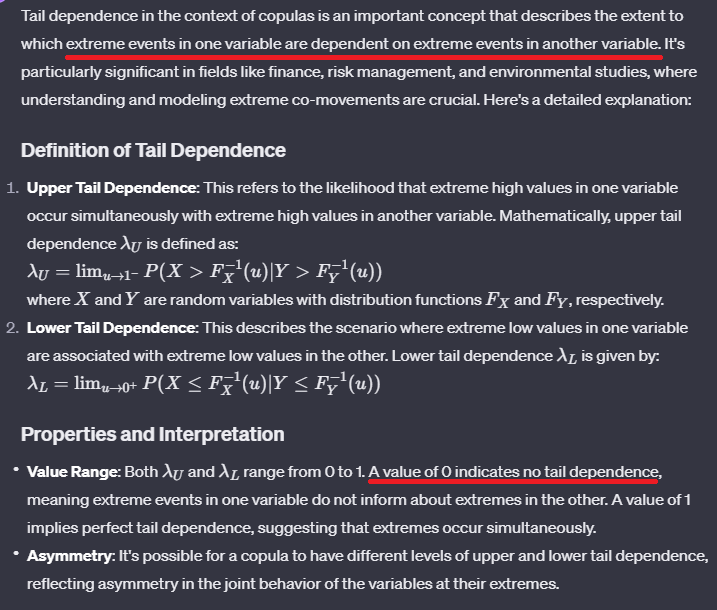

## **3. Commonly Used Copulas**

### **3.1 Elliptical Copulas**

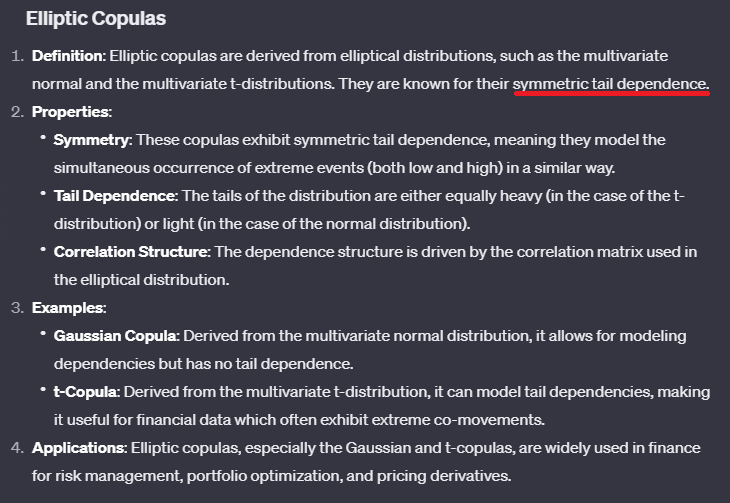

The **Normal (Gaussian) copula** and **Student's t-copula** are two copulas in the elliptical copula family. 

**Gaussian Copula:**

> Bivariate Copula: $C_{\rho} (u_x, u_y)= \Phi_{\Sigma}( \Phi^{-1}(u_x), \Phi^{-1}(u_y))$
>
> Parameter: $\rho$ = Pearson Correlation where $\rho \in [-1, 1]$

* $\Sigma$ is a 2-by-2 matrix with $1$ on the diagonal and $\rho$ off the diagonal.

* $\Phi^{-1}$ is the inverse CDF of standard normal distribution. 

* $\Phi_{\Sigma}$ is the joint CDF of a bivariate normal distribution with mean = $0$ and correlation matrix = $\Sigma$.

The relationship between the Gaussian copula's parameter $\rho$ and **Kendall's tau** is as follows:

$$ \rho(X,Y) = \sin \Big(\frac{\pi}{2} \tau \Big) $$


**Student's t-Copula:**

> Bivariate Copula: $C_{u,\Sigma} (U_x, U_y) = t_{u,\Sigma} ( t^{-1}_{u} (U_x), t^{-1}_{u} (U_y))$
>
> Parameter: $\rho$ = Pearson Correlation  where $\rho \in [-1,1]$ and $u$ = Degree of Freedom 

* $\Sigma$ is a 2-by-2 matrix with $1$ on the diagonal and $\rho$ off the diagonal.

* $t_u^{-1}$ is the inverse CDF of univariate Student's t-distribution. 
 
* $t_{u,\Sigma}$ is the CDF of a bivariate Student's t-distribution with degree of freedom = $u$ and correlation matrix = $\Sigma$.

<u> When the degree of freedom $u$ gets large, the Student's t-distribution will converge to Gaussian distribution. </u> The relationship between the Student's t-copula parameter $\rho$ and Kendall's tau is as follows:

$$ \rho(X,Y) = \sin \Big(\frac{\pi}{2} \tau \Big) $$



**Figure 5: Copula Densities for Gaussian Copula vs. Student's t-Copula with $\rho = 0.3$ and df $= 2$**


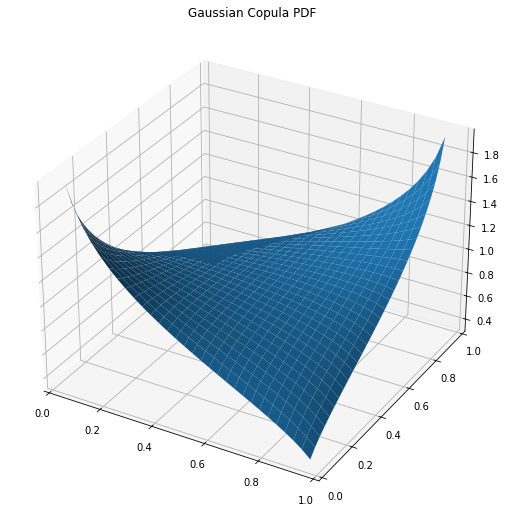

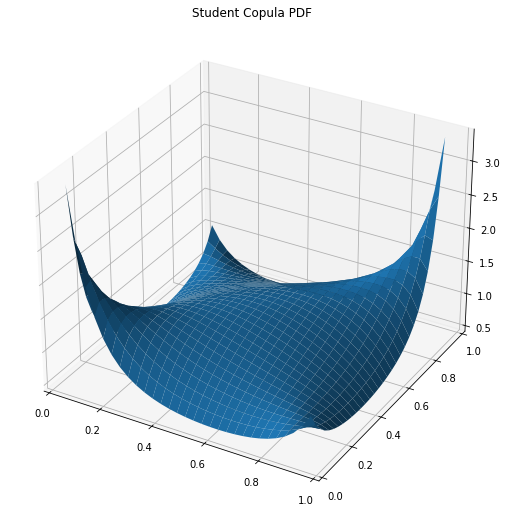

In [22]:
# Gaussian Copula vs. Student's t-Copula
pycop.gaussian().plot_pdf([0.3, 2], plot_type="3d", Nsplit=30)
pycop.student().plot_pdf([0.3, 2], plot_type="3d", Nsplit=30)

From figure 5, we draw the copula density functions for both a Gaussian copula and Student's t-copula with a Pearson correlation = 0.3 and degrees of freedom = 2 (for Student's t-copula). We can see that both copulas have a similar pattern in the middle, but in the Student's t-copula, the four corners are higher. It means that the Student's t-copula has more extreme cases than the Gaussian copula. It shows that the Student's t-copula has both upper-tail dependence and lower-tail dependence whereas the Gaussian copula is asymptotically independent for both upper- and lower-tail dependence. 


### **3.2 Archimedean Copulas**

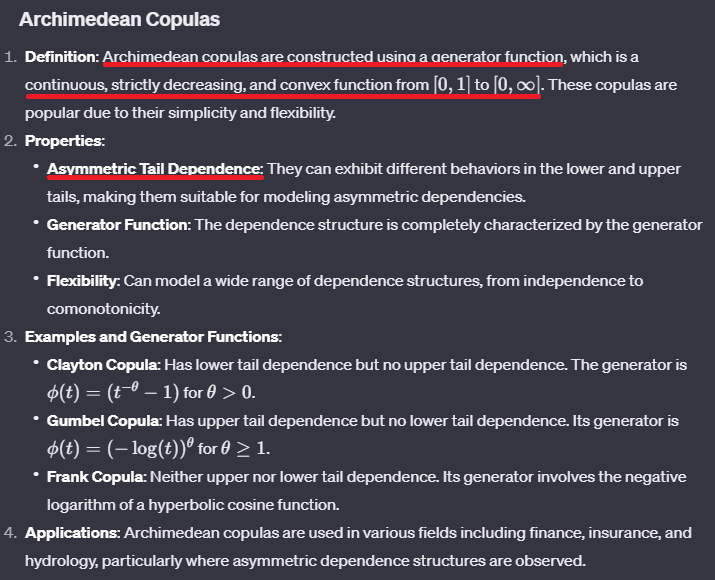

Another popular Copula group among researchers is **Archimedean copulas**. Archimedean copulas have an explicitly defined copula formula and math properties that we can manipulate. An Archimedean copula is defined as follows:

$$ C(u_x, u_y) = \varphi^{-1} (\varphi(u_x) + \varphi(u_y)) $$

Where $\varphi$ is a decreasing function mapping $[0,1]$ to $[0, \infty)$

$\varphi$ is called the generator of Archimedean Copula. With different $\varphi$, we can create different copulas. We will go through two common ones: Clayton and Gumbel copulas.

**Clayton Copula:**

> Bivariate Copula: $C_{\theta} (u_x, u_y) = [\max (u_x^{-\theta} + u_y^{-\theta} -1; 0) ]^{\frac{-1}{\theta}} $
> 
> Parameter: $\theta$ where $\theta \in [-1,\infty)$ without $0$
>
> Generator: $\phi(u) = \frac{1}{\theta} (\theta^{-1}-1)$

The relationship between Clayton Copula's parameter $\theta$ and Kendall's-tau is as follows:

$$ \theta = \frac{2\tau}{1 - \tau} $$

From the above formula, we know as $\theta \to 0$, a Clayton copula turns into an independence copula. As $\theta \to \infty $, a Clayton copula turns into a comonotonic copula. As $\theta = -1$, a Clayton copula reaches the Hoeffding and Frechet lower bound.

**Gumbel Copula:**

> Bivariate Copula: $ C_{\theta}(u_x, u_y)=\exp [-((-\ln u_x)^{\theta} + (-\ln u_y)^{\theta})^{\frac{1}{\theta}} ]$
>
> Parameter: $\theta$ where $\theta \in [1,\infty )$
>
> Generator: $ \phi(u) = (-\ln u)^{\theta}$

The relationship between a Gumbel copula's parameter $\theta$ and Kendall's tau is as follows:

$$ \theta = \frac{1}{\tau} $$

When $\theta = 1$, a Gumbel copula becomes an independence copula. As $\theta \to \infty$ a Gumbel copula turns into a comonotonic copula.

**Figure 6: Copula Densities for Clayton Copula and Gumbel Copula with $\theta = 2$**


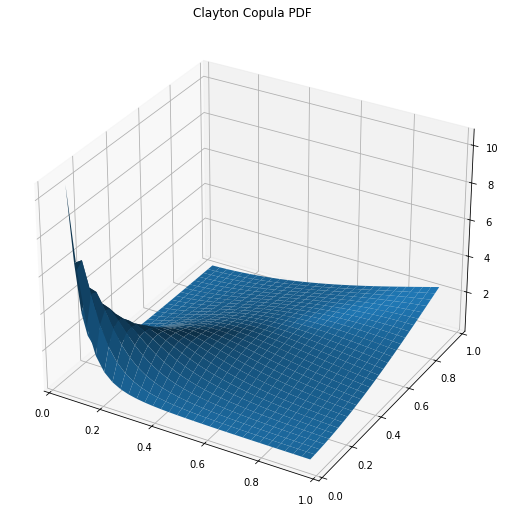

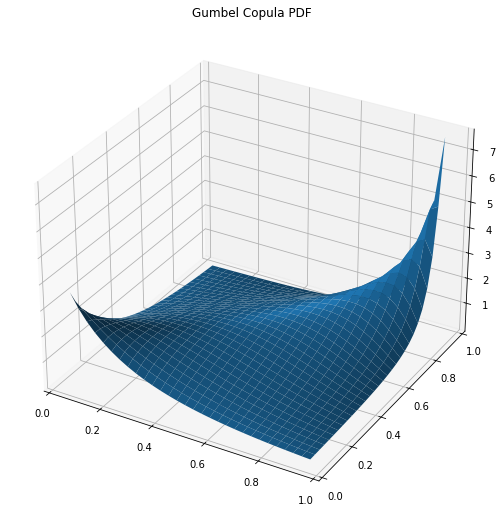

In [23]:
# Clayton Copula and Gumbel Copula
pycop.archimedean(family="clayton").plot_pdf([2], plot_type="3d", Nsplit=30)
pycop.archimedean(family="gumbel").plot_pdf([2], plot_type="3d", Nsplit=30)

In figure 6, we have copula densities for Clayton and Gumbel copulas. We can see Clayton has a high tail near $(0,0)$ while Gumbel has a high tail at $(1,1)$. According to the graphs, Clayton has lower-tail dependence, and Gumbel has upper-tail dependence. Both Clayton and Gumbel are one-tail dependence Copulas. This is important in finance because there are asset returns that exhibit many negative extreme value cases. Clayton copulas can be a good choice for modeling this phenomenon.


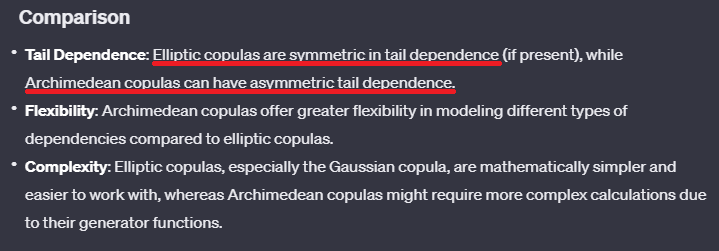

## **4. Example: Joint Distribution for Stock Market Index Returns and Treasury Yield Return**

**Figure 7: Scatter Plot for Dow Jones Industrial Average Daily Return and U.S. 10-Year Treasury Bond Yield Daily Return**


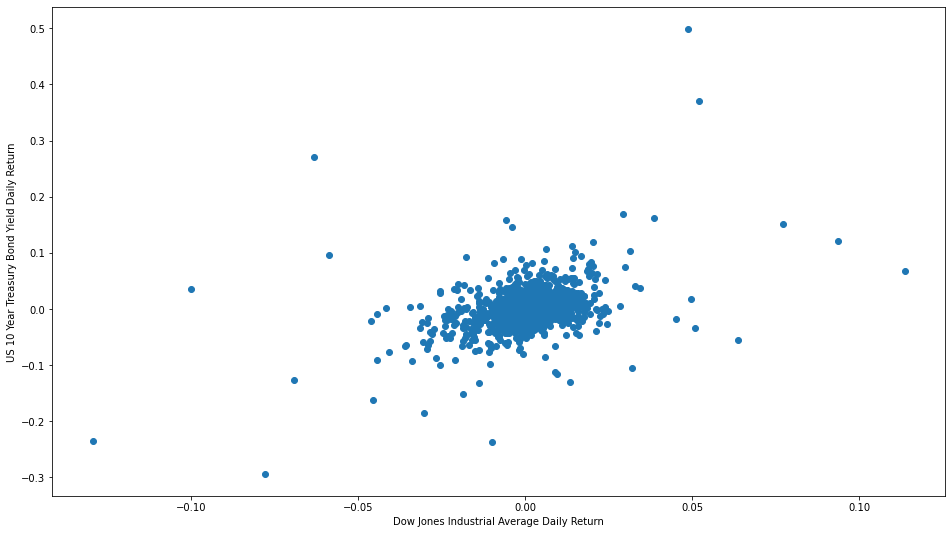

In [24]:
# Scatter Plot for DWJ and 10Y_TBY
plt.scatter(data_set["DWJ"], data_set["10Y_TBY"])
plt.xlabel("Dow Jones Industrial Average Daily Return")
plt.ylabel("US 10 Year Treasury Bond Yield Daily Return")
plt.show()

From figure 7, we can see the two variables are mildly positive correlated. Their Kendall's tau is 0.24.

From previous lessons, we know that daily returns do not exhibit normal distribution characteristics. Our data exhibits some heavy tails on both the lower and upper sides. A Student's t-copula seems to be a good candidate since this copula also has heavy tails on both sides. But we need a more formal method for selecting the copula function. Fortunately, the statistical application used here can conduct copula model selection automatically as shown in next figure. The result suggested by the application is to use Student's t-copula for our data. 

Our next step before fitting a Student's t-copula model is to transform the data. We know from the theory that <u> we need to transform our data to become standard and uniformly distributed. </u> After having transformed the data, we can now fit the Student's t-copula model. Here is the summary of the model fit.


**Figure 8: Student's t Model Result for Dow Jones Industrial Average Daily Return and U.S. 10-Year Treasury Bond Yield Daily Return**


In [25]:
# Identifying copula subclass from family of univariate copulas

# Fit GaussianMultivariate copula and estimate parameters
data = pd.DataFrame([data_set["DWJ"], data_set["10Y_TBY"]]).T
dist = GaussianMultivariate()
dist.fit(data)
parameters = dist.to_dict()
print(parameters)

{'correlation': [[1.0, 0.3692836463111201], [0.3692836463111201, 1.0]], 'univariates': [{'df': 2.0712754501675628, 'loc': 0.0009591347281057657, 'scale': 0.005319943370578768, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}, {'df': 2.476937976908883, 'loc': -0.0002659375213439429, 'scale': 0.01741379821223915, 'type': 'copulas.univariate.student_t.StudentTUnivariate'}], 'columns': ['DWJ', '10Y_TBY'], 'type': 'copulas.multivariate.gaussian.GaussianMultivariate'}


In [26]:
# print covariance matrix
print(
    "Correlation : ",
    pd.DataFrame(
        parameters["correlation"],
        index=parameters["columns"],
        columns=parameters["columns"],
    ),
)

# print df/loc/scale parameters and copula subclass type
print(
    "- - - - - - - - - - - - - - -Parameters : ",
    pd.DataFrame(parameters["univariates"], index=parameters["columns"]),
)

Correlation :                DWJ   10Y_TBY
DWJ      1.000000  0.369284
10Y_TBY  0.369284  1.000000
- - - - - - - - - - - - - - -Parameters :                 df       loc     scale  \
DWJ      2.071275  0.000959  0.005320   
10Y_TBY  2.476938 -0.000266  0.017414   

                                                    type  
DWJ      copulas.univariate.student_t.StudentTUnivariate  
10Y_TBY  copulas.univariate.student_t.StudentTUnivariate  


The above results suggest Student's t-copula is best fit so we proceed with fitting Student's t-copula model.


In [27]:
# Fit student copula and estimate df and rho parameters
result = copulae.elliptical.student.StudentCopula(df=2).fit(
    data, method="ml", fix_df=True
)
print("- - - - - - - - - - - - - - -df and rho parameters : ", result.params)

               DWJ      10Y_TBY
count  1507.000000  1507.000000
mean      0.500000     0.500000
std       0.288579     0.288578
min       0.000663     0.000663
25%       0.250332     0.250332
50%       0.500000     0.499005
75%       0.749668     0.749668
max       0.999337     0.999337
- - - - - - - - - - - - - - -df and rho parameters :  StudentParams(df=4.669, rho=array([0.3957575]))


From figure 8, we can see the two estimated parameters. The First one is the degree of freedom. The second one 'rho' is the dependence parameter. In this model, the estimated rho is 0.3957575. We can use the parameter–rho conversion formula for Student's t-copula in section 3.1 to obtain Kendall's tau. The estimated Kendall's tau is 0.24, the same as we obtained from the original data.
<span style='color: transparent; font-size:1%'>All rights reserved WQU WorldQuant University QQQQ</span>

Next, we are going to do some tests to check for model goodness-of-fit. We selected a normal copula, Student's t-copula, Clayton copula, and Gumbel copula to run the test. Figure 9 shows the results.

The goodness-of-fit statistic for the class of copula compares the empirical copula against a parametric estimate of the copula derived under the null hypothesis. Given the pseudo-observations $ U_{ij} \forall i = 1, \cdots, n; j = 1, \cdots, d $ and the empirical copula given by 
    
$$ C_n (\textbf{u}) = \frac{1}{n} \sum^n_{i=1} \textbf{I} (U_{i1} \leq u_1, \cdots, U_{id} \leq u_d) $$
    
where $\textbf{u} \in [0, 1]^d$, the null hypothesis, $H_0$ thus tests if
    
$$ C \in C_0 $$
    
where $C_0$ is the true class of the copulae under $H_0$. The test statistic $T$ is defined as
    
$$ T = n \int_{[0, 1]^d} [C_n(\textbf{u}) - C_{\theta_n}(\textbf{u})]^2 dC_n(\textbf{u}) $$
    
where $ C_{\theta_n} (\textbf{u})$ is the estimation of $C$ under $H_0$.
    
The approximate $p$-value is then given by:
    
$$  \frac{\sum^M_{k=1}\textbf{I}(|T_k| \geq |T|)}{M} $$
